## Data Understanding

Isi Dataset
Dataset Book-Crossing terdiri dari 3 file.

- Users

Berisi data pengguna. Perlu diperhatikan bahwa ID pengguna (User-ID) telah dianonimkan dan dipetakan ke dalam angka. Data demografi (Lokasi, Usia) disediakan jika tersedia. Jika tidak, kolom ini akan berisi nilai NULL.

- Books

Buku diidentifikasi berdasarkan ISBN masing-masing. ISBN yang tidak valid telah dihapus dari dataset. Selain itu, terdapat beberapa informasi berbasis konten seperti Book-Title, Book-Author, Year-Of-Publication, dan Publisher, yang diperoleh dari Amazon Web Services. Perlu dicatat bahwa jika ada beberapa penulis, hanya penulis pertama yang dicantumkan. URL yang mengarah ke gambar sampul buku juga disediakan dalam tiga ukuran berbeda (Image-URL-S, Image-URL-M, Image-URL-L), yaitu kecil, sedang, dan besar. URL ini mengarah ke situs Amazon.

- Ratings

Berisi informasi mengenai penilaian buku. Penilaian (Book-Rating) dapat berupa eksplisit, yang dinyatakan dalam skala 1-10 (dengan nilai lebih tinggi menunjukkan apresiasi lebih tinggi), atau implisit, yang dinyatakan dengan nilai 0.

In [1]:
import pandas as pd

books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\ziyad\AppData\Local\Temp\ipykernel_23556\907619549.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [2]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


books dataset:

1. ISBN: ISBN adalah singkatan dari International Standard Book Number. ISBN merupakan pengenal numerik unik yang digunakan untuk mengidentifikasi buku dan publikasi monograf lainnya. Setiap ISBN terdiri dari rangkaian digit yang secara unik mengidentifikasi edisi atau versi tertentu dari sebuah buku.
Tujuan ISBN adalah menyediakan metode standar untuk mengidentifikasi dan mengkatalogkan buku. ISBN membantu penerbit, penjual buku, perpustakaan, dan organisasi lain untuk mengelola dan melacak buku dengan efisien. Dengan menggunakan ISBN, sebuah buku dapat dengan mudah ditemukan, dipesan, dan dijual secara internasional.

2. Book-Title: Judul dari buku.

3. Book-Author: Penulis buku.

4. Year-Of-Publication: Tahun penerbitan buku.

5. Publisher: Penerbit adalah organisasi atau perusahaan yang bertanggung jawab untuk memproduksi dan mendistribusikan buku kepada publik. Penerbit menangani berbagai aspek dari proses penerbitan buku, termasuk mendapatkan naskah, mengedit, merancang, mencetak, memasarkan, dan mendistribusikan buku.

6. Image-URL-S: URL pendek untuk gambar sampul buku.

7. Image-URL-M: URL ukuran sedang untuk gambar sampul buku.

8. Image-URL-L: URL ukuran panjang untuk gambar sampul buku.

In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


users dataset:

1. User-ID: ID pengguna dari pembaca/pelanggan yang memberikan ulasan untuk buku.
2. Location: Lokasi pengguna.
3. Age: Usia pengguna.

In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


ratings dataset:

1. User-ID: ID pengguna dari pembaca/pelanggan yang memberikan ulasan untuk buku.
2. ISBN: Pengenal unik untuk buku yang telah diulas.
3. Book-Rating: Penilaian untuk buku tertentu.

## Univariate Exploratory Data Analysis and Data Preparation

Pada tahapan ini dilakukan analisis dari setiap dataset yang saya miliki, yaitu dataset pada Books.csv, Rating.csv, dan Users.csv. Langkah-langkah dalam melakukan univariate EDA ini meliputi jumlah data pada setiap dataset, tipe data pada setiap dataset, kodisi missing value pada setiap dataset, dan kondisi duplikasi pada setiap dataset

#### Books Univariate Exploratory Data Analysis

In [5]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [6]:
print("Books Data:", books.shape)

Books Data: (271360, 8)


Total baris pada dataset books adalah 271360 dan total kolom adalah 5. 

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Hasil dari kodingan diatas, terdapat kesalah pada tipe data 'Year-Of-Publication' yang seharusnya adalah integer. Kesalahan ini nantinya akan diperbaiki pada saat proses data preparation.

In [8]:
## Checking for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Berdasarkan hasil diatas, terdapat nilai kosong sebanyak 2 pada kolom "Book-Author" dan "Publisher"

In [9]:
# Menampilkan semua baris dalam dataset Books di mana kolom 'Book-Author' bernilai kosong (NaN).
books[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [10]:
# Menampilkan semua baris dalam dataset Books di mana kolom 'Publisher' bernilai kosong (NaN).
books[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [11]:
books.duplicated().sum()

0

Tidak ada data duplikat pada books.csv

#### Books Data Preparation

In [12]:
## Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

Kode diatas menjelaskan membuang kolom yang tidak digunakan untuk analis lebih lanjut.

In [13]:
# Mengisi nilai kosong (NaN) pada kolom 'Book-Author' dengan string 'Other'.
books['Book-Author'] = books['Book-Author'].fillna('Other')

# Mengisi nilai kosong (NaN) pada kolom 'Publisher' dengan string 'Other'.
books['Publisher'] = books['Publisher'].fillna('Other')

Kode diatas adalah mengisi kolom kosong pada kolom 'Book-Author' dan 'Publisher' dengan string Other

In [14]:
# books[books['Book-Author']=='Other']

In [15]:
# books[books['Publisher']=='Other']

In [16]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Saya melihat bahwa kolom Year-Of-Publication memiliki tipe data object, dan terdapat beberapa masalah, seperti nilai nol (0) serta kesalahan lainnya, misalnya nama-nama seperti "Gallimard" dan "DK Publishing Inc" yang secara keliru dimasukkan ke dalam kolom tahun penerbitan. Oleh karena itu, saya akan memperbaiki kesalahan tersebut.

Mendeteksi kesalahan pada kolom Year-Of-Publication:

Syntax dibawah digunakan untuk menemukan entri di mana kolom Year-Of-Publication memiliki nilai 'DK Publishing Inc', yang seharusnya merupakan nilai dari kolom Publisher.

In [17]:
books[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


Memeriksa informasi tambahan untuk ISBN tertentu:

Syntax dibawah digunakan untuk melihat judul buku (Book-Title) yang terkait dengan ISBN 078946697X.

In [18]:
books[books['ISBN'] == '078946697X']['Book-Title'].values[0]

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

hasil dari syntax diatas datanya tidak terstruktur dengan baik karena berisi nama penulis di dalamnya.

Kesalahan dalam entri dengan ISBN 078946697X diperbaiki dengan menetapkan ulang nilai kolom yang relevan:

- Publisher diatur menjadi 'DK Publishing Inc'.
- Book-Author diatur menjadi 'Michael Teitelbaum'.
- Year-Of-Publication diatur menjadi 2000.
- Book-Title diperbaiki menjadi judul yang benar tanpa nama penulis: 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'.

In [19]:
books.loc[books['ISBN'] == '078946697X', 'Publisher'] = 'DK Publishing Inc'
books.loc[books['ISBN'] == '078946697X', 'Book-Author'] = 'Michael Teitelbaum'
books.loc[books['ISBN'] == '078946697X', 'Year-Of-Publication'] = 2000
books.loc[books['ISBN'] == '078946697X', 'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

Setelah dilakukan perbaikan, syntax dibawah ini digunakan untuk memverifikasi dan menampilkan kembali baris dalam dataset Books yang memiliki ISBN 078946697X. Tujuannya adalah untuk memastikan bahwa data yang telah diperbaiki, seperti Book-Title, Book-Author, Year-Of-Publication, dan Publisher, sudah sesuai dan tidak ada lagi kesalahan dalam entri tersebut setelah dilakukan pembaruan. Kode ini memastikan bahwa entri dengan ISBN tersebut telah diperbaiki dan data konsisten.

In [20]:
# Menampilkan baris dalam dataset Books yang memiliki ISBN '078946697X' untuk memeriksa informasi buku terkait.
books[books['ISBN'] == '078946697X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc


Memeriksa informasi tambahan untuk ISBN tertentu:

Syntax dibawah digunakan untuk melihat judul buku (Book-Title) yang terkait dengan ISBN 0789466953.

In [21]:
books[books['ISBN'] == '0789466953']['Book-Title'].values[0]

'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"'

hasil dari syntax diatas datanya tidak terstruktur dengan baik karena berisi nama penulis di dalamnya.

Kesalahan dalam entri dengan ISBN 078946697X diperbaiki dengan menetapkan ulang nilai kolom yang relevan:

- Publisher diatur menjadi 'DK Publishing Inc'.
- Book-Author diatur menjadi 'James Buckley'.
- Year-Of-Publication diatur menjadi 2000.
- Book-Title diperbaiki menjadi judul yang benar tanpa nama penulis: 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'.

In [22]:
books.loc[books['ISBN'] == '0789466953', 'Publisher'] = 'DK Publishing Inc'
books.loc[books['ISBN'] == '0789466953', 'Book-Author'] = 'James Buckley'
books.loc[books['ISBN'] == '0789466953', 'Year-Of-Publication'] = 2000
books.loc[books['ISBN'] == '0789466953', 'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

Setelah dilakukan perbaikan, syntax dibawah ini digunakan untuk memverifikasi dan menampilkan kembali baris dalam dataset Books yang memiliki ISBN 0789466953. Tujuannya adalah untuk memastikan bahwa data yang telah diperbaiki, seperti Book-Title, Book-Author, Year-Of-Publication, dan Publisher, sudah sesuai dan tidak ada lagi kesalahan dalam entri tersebut setelah dilakukan pembaruan. Kode ini memastikan bahwa entri dengan ISBN tersebut telah diperbaiki dan data konsisten.

In [23]:
books[books['ISBN'] == '0789466953']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


Mendeteksi kesalahan pada kolom Year-Of-Publication:

Syntax dibawah digunakan untuk menemukan entri di mana kolom Year-Of-Publication memiliki nilai 'Gallimard', yang seharusnya merupakan nilai dari kolom Publisher.

In [24]:
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


Memeriksa informasi tambahan untuk ISBN tertentu:

Syntax dibawah digunakan untuk melihat judul buku (Book-Title) yang terkait dengan ISBN 070426769.

In [25]:
books[books['ISBN'] == '2070426769']['Book-Title'].values[0]

'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"'

Hasil dari syntax diatas datanya tidak terstruktur dengan baik karena berisi nama penulis di dalamnya.

Kesalahan dalam entri dengan ISBN 078946697X diperbaiki dengan menetapkan ulang nilai kolom yang relevan:

- Publisher diatur menjadi 'Gallimard'.
- Book-Author diatur menjadi 'Jean-Marie Gustave Le ClÃ?Â©zio'.
- Year-Of-Publication diatur menjadi 2003.
- Book-Title diperbaiki menjadi judul yang benar tanpa nama penulis: 'Peuple du ciel - Suivi de Les bergers'.

In [26]:
books.loc[books['ISBN'] == '2070426769', 'Publisher'] = 'Gallimard'
books.loc[books['ISBN'] == '2070426769', 'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books['ISBN'] == '2070426769', 'Year-Of-Publication'] = 2003
books.loc[books['ISBN'] == '2070426769', 'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers'

Setelah dilakukan perbaikan, syntax dibawah ini digunakan untuk memverifikasi dan menampilkan kembali baris dalam dataset Books yang memiliki ISBN 2070426769. Tujuannya adalah untuk memastikan bahwa data yang telah diperbaiki, seperti Book-Title, Book-Author, Year-Of-Publication, dan Publisher, sudah sesuai dan tidak ada lagi kesalahan dalam entri tersebut setelah dilakukan pembaruan. Kode ini memastikan bahwa entri dengan ISBN tersebut telah diperbaiki dan data konsisten.

In [27]:
books[books['ISBN'] == '2070426769']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,Peuple du ciel - Suivi de Les bergers,Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


Menentukan Tahun Paling Umum:

In [28]:
most_frequent = books['Year-Of-Publication'].value_counts()
most_common_year = most_frequent[most_frequent == most_frequent.max()].index.tolist()
most_common_year

[2002]

Mengubah Tipe Data Kolom Tahun menjadi integer:

In [29]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


Menghitung Tahun yang Tidak Valid:

In [30]:
# Menghitung publikasi yang Year-Of-Publication lebih dari 2020
above_2020 = books[books['Year-Of-Publication'] > 2020]
count_above_2020 = above_2020.shape[0]

# Menghitung publikasi yang Year-Of-Publication sama dengan 0
equal_to_0 = books[books['Year-Of-Publication'] == 0]
count_equal_to_0 = equal_to_0.shape[0]

# Total jumlah publikasi
total_count = books.shape[0]

# Menampilkan hasil
print(f"Jumlah publikasi dengan Year-Of-Publication > 2020: {count_above_2020}")
print(f"Jumlah publikasi dengan Year-Of-Publication = 0: {count_equal_to_0}")
print(f"Total publikasi: {total_count}")

Jumlah publikasi dengan Year-Of-Publication > 2020: 14
Jumlah publikasi dengan Year-Of-Publication = 0: 4618
Total publikasi: 271360


Memperbaiki Tahun yang Tidak Valid:

In [31]:
books.loc[(books['Year-Of-Publication'] > 2020) | (books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = 2002

Memperbaiki entri tersebut dengan mengganti nilai tahun publikasi menjadi tahun yang paling umum, yaitu 2002, untuk memastikan data lebih konsisten dan realistis.

In [32]:
print("The number of 0s in Year-Of-Publication column after using mode is: " + str((books['Year-Of-Publication'] == 0).sum()))

The number of 0s in Year-Of-Publication column after using mode is: 0


In [33]:
print("The number of more than 2020s in Year-Of-Publication column after using mode is: " + str((books['Year-Of-Publication'] > 2020).sum()))

The number of more than 2020s in Year-Of-Publication column after using mode is: 0


In [34]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

Memeriksa kembali untuk memastikan data yang sudah kita perbaiki tidak ada missing value.

In [35]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


Pembersihan Data pada Kolom Publisher

Pada langkah ini, saya melakukan pembersihan data pada kolom Publisher dalam dataset Books. Terkadang, data yang diambil dari sumber web atau layanan seperti Amazon mengandung karakter khusus yang di-encode dalam format HTML. Salah satu contohnya adalah simbol ampersand (&) yang di-encode sebagai &amp;.

Untuk memastikan bahwa data Publisher konsisten dan mudah dibaca, saya mengganti semua kemunculan &amp; dengan simbol ampersand biasa (&). Proses ini tidak hanya meningkatkan keterbacaan data tetapi juga mencegah potensi kesalahan dalam analisis atau visualisasi data selanjutnya.

In [36]:
books.Publisher = books.Publisher.str.replace('&amp;', '&', regex=False)

Selanjutnya adalah dilakukan visualisasi pada dataset Books.csv untuk memberikan insight dari setiap hasil visualisasi.

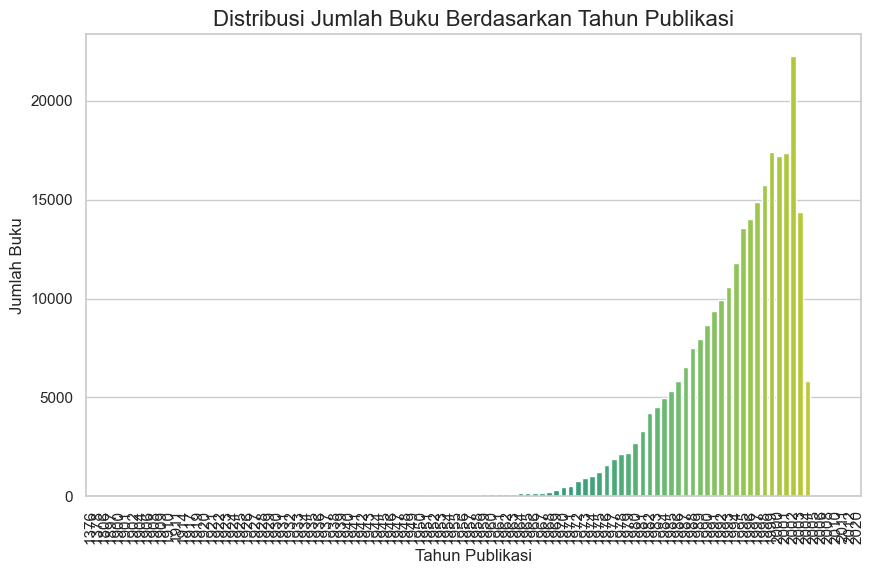

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting the distribution of Year-Of-Publication
plt.figure(figsize=(10,6))
sns.countplot(data=books, x='Year-Of-Publication', palette='viridis')
plt.title('Distribusi Jumlah Buku Berdasarkan Tahun Publikasi', fontsize=16)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.xlabel('Tahun Publikasi')
plt.ylabel('Jumlah Buku')
plt.show()

Visualisasi di atas menunjukkan distribusi jumlah buku berdasarkan tahun publikasi. Sebelum visualisasi ini dibuat, masalah terkait tahun publikasi yang tidak valid, seperti tahun outlier di masa depan (>2020) atau tahun 0, telah diatasi dengan mengganti nilai tersebut menjadi tahun 2002, yang merupakan tahun publikasi paling umum dalam dataset ini. Dengan demikian, data yang divisualisasikan mencerminkan distribusi yang lebih konsisten dan bebas dari outlier.

Melalui grafik ini, saya dapat mengidentifikasi tren penerbitan buku dari waktu ke waktu, seperti peningkatan jumlah buku pada tahun-tahun tertentu. Grafik ini memberikan wawasan awal mengenai pola publikasi buku dan dapat digunakan sebagai dasar untuk analisis lebih lanjut, misalnya apakah terdapat hubungan antara tren ini dengan variabel lain seperti genre atau penerbit tertentu.

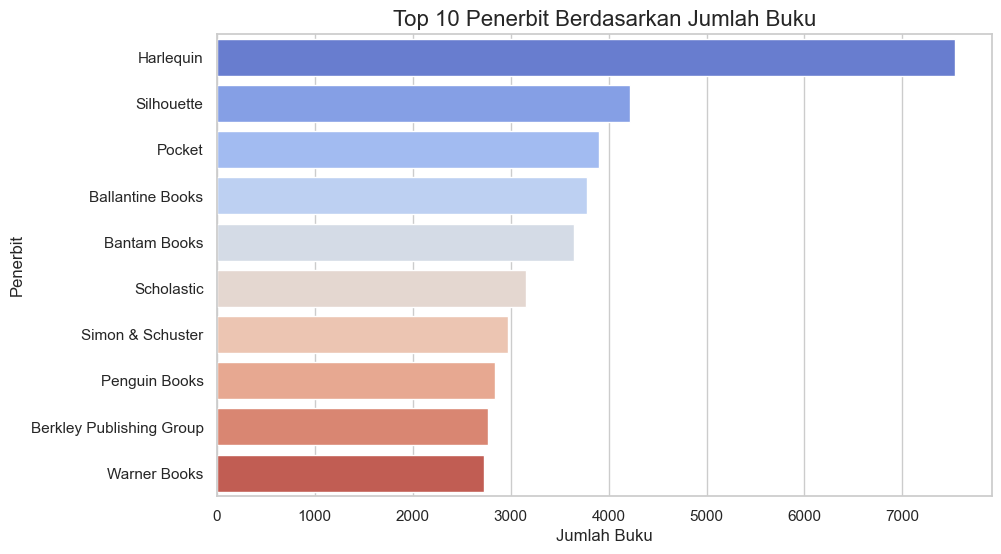

In [38]:
# Plotting the top 10 publishers
top_publishers = books['Publisher'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')
plt.title('Top 10 Penerbit Berdasarkan Jumlah Buku', fontsize=16)
plt.xlabel('Jumlah Buku')
plt.ylabel('Penerbit')
plt.show()

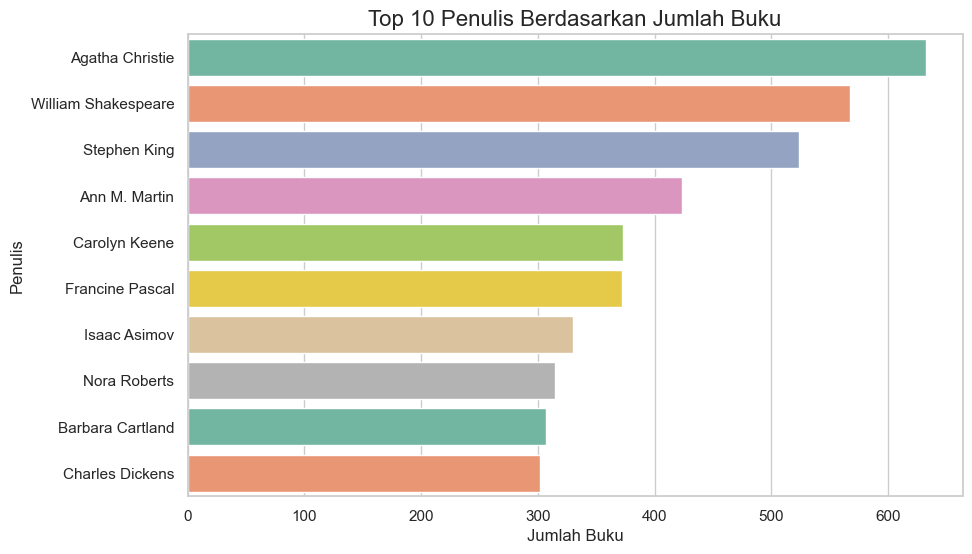

In [39]:
# Plotting the top 10 authors
top_authors = books['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='Set2')
plt.title('Top 10 Penulis Berdasarkan Jumlah Buku', fontsize=16)
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')
plt.show()


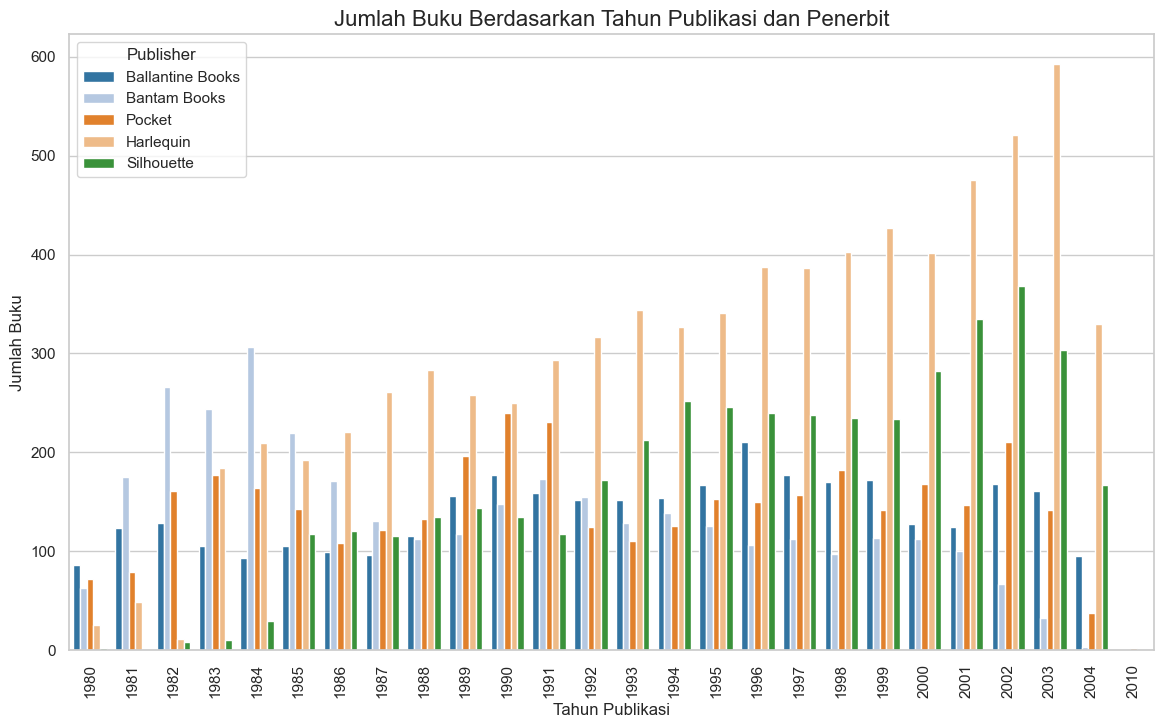

In [40]:
# Menyaring 10 penerbit dengan jumlah buku terbanyak
top_publishers = books['Publisher'].value_counts().head(5).index
filtered_books = books[books['Publisher'].isin(top_publishers)]

# Menyaring data dengan tahun publikasi antara 1980 dan 2020
filtered_books = filtered_books[(filtered_books['Year-Of-Publication'] >= 1980) & 
                                 (filtered_books['Year-Of-Publication'] <= 2020)]

# Plotting the number of books published by publisher and year
plt.figure(figsize=(14,8))
sns.countplot(data=filtered_books, x='Year-Of-Publication', hue='Publisher', palette='tab20', dodge=True)
plt.title('Jumlah Buku Berdasarkan Tahun Publikasi dan Penerbit', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Tahun Publikasi')
plt.ylabel('Jumlah Buku')
plt.show()

In [41]:
# Count unique publishers and authors
unique_publishers = books['Publisher'].nunique()
unique_authors = books['Book-Author'].nunique()

# Display the counts
print(f"Jumlah Penerbit Unik: {unique_publishers}")
print(f"Jumlah Penulis Unik: {unique_authors}")

Jumlah Penerbit Unik: 16805
Jumlah Penulis Unik: 102021


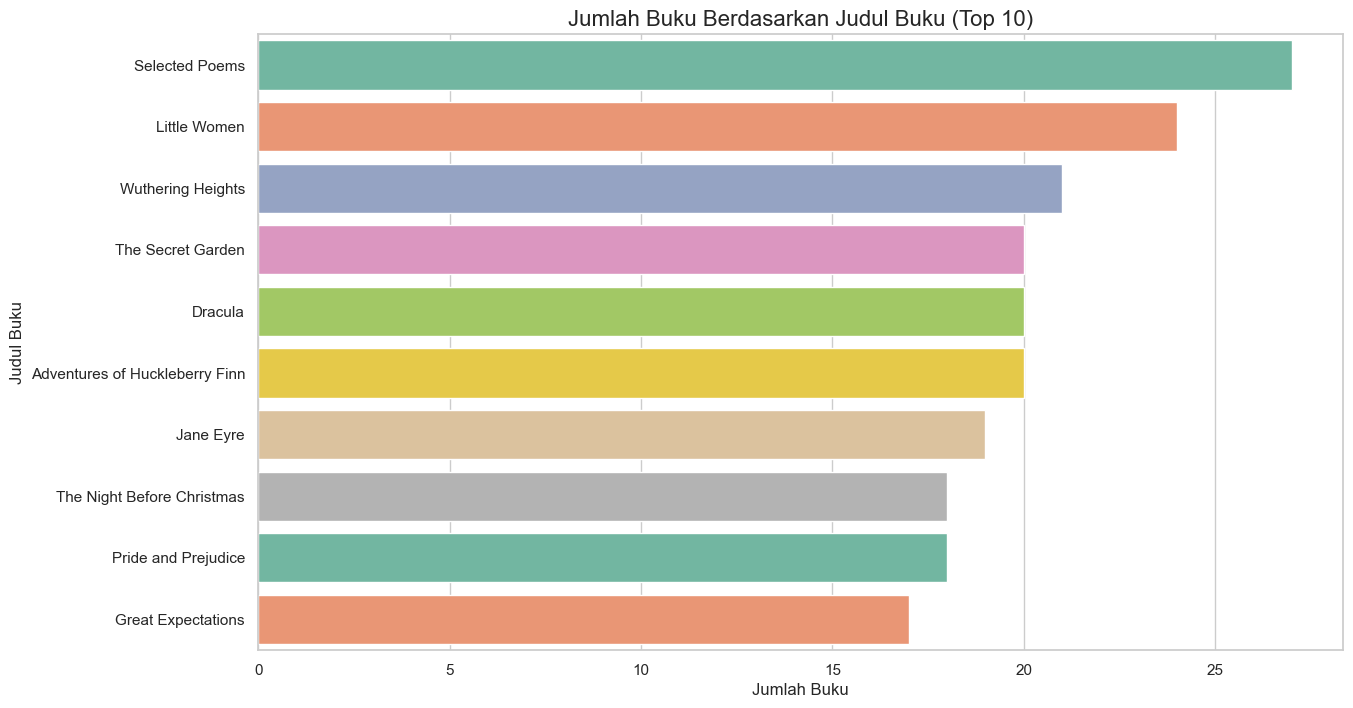

In [42]:
# Menyaring 10 judul buku dengan jumlah terbanyak
top_books = books['Book-Title'].value_counts().head(10).index
filtered_books_by_title = books[books['Book-Title'].isin(top_books)]

# Plotting the number of books by book title
plt.figure(figsize=(14,8))
sns.countplot(data=filtered_books_by_title, y='Book-Title', palette='Set2', order=top_books)
plt.title('Jumlah Buku Berdasarkan Judul Buku (Top 10)', fontsize=16)
plt.xlabel('Jumlah Buku')
plt.ylabel('Judul Buku')
plt.show()


In [43]:
books[books['Book-Title']=='Little Women']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
3952,185854176X,Little Women,Louisa M. Atcott,1995,Brimax Books Ltd
4330,0861782356,Little Women,Louisa May Alcott,2002,Octopus Publising Group Plc
12227,0590203509,Little Women,Louisa May Alcott,1994,Scholastic
20676,0440447682,Little Women,Louisa May Alcott,1990,Yearling Books
32837,1550134140,Little Women,Louisa May Alcott,2002,Firefly Books Ltd
52210,0451529308,Little Women,Louisa May Alcott,2004,Signet Classics
52551,0451518144,Little Women,Louisa May Alcott,1983,Signet Book
53358,0590437976,Little Women,Louisa May Alcott,1992,Scholastic
57432,0195813898,Little Women,Alcott,1985,Oxford University Press
72168,0785788727,Little Women,Louisa May Alcott,1999,Sagebrush Bound


Buku yang sama, meskipun ditulis oleh penulis yang sama, sering kali memiliki beberapa ISBN unik. Ini dapat terjadi karena buku tersebut diterbitkan oleh penerbit yang berbeda atau diterbitkan dalam tahun yang berbeda. Dalam konteks membangun sistem rekomendasi buku, hal ini menjadi penting untuk diperhatikan. Jika buku yang sama diidentifikasi dengan ISBN yang berbeda, ini bisa menyebabkan rekomendasi menjadi kurang akurat atau berulang. Oleh karena itu, nantinya mungkin saya perlu menyatukan ISBN untuk edisi-edisi buku yang sama agar sistem rekomendasi dapat bekerja lebih optimal. Namun, langkah ini akan dipertimbangkan lebih lanjut selama proses pengembangan sistem rekomendasi.

### Ratings Univariate Exploratory Data Analysis

In [44]:
print("Books-ratings:", ratings.shape)

Books-ratings: (1149780, 3)


Total baris pada dataset books adalah 1149780 dan total kolom adalah 3. 

In [45]:
## Checking for null values
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [46]:
# Checking of duplicates 
ratings.duplicated().sum()

0

In [47]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Sintak ratings.info() memberikan gambaran tentang dataset ratings yang memiliki 1.149.780 entri dan 3 kolom: User-ID (int64), ISBN (object), dan Book-Rating (int64). 

In [48]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

Sintak ratings['Book-Rating'].unique() menampilkan nilai unik yang terdapat pada kolom Book-Rating dalam dataset ratings. Nilai yang muncul adalah angka antara 0 hingga 10, yang menunjukkan berbagai tingkat penilaian buku oleh pengguna. Nilai 0 biasanya mengindikasikan rating implisit atau ketidakadaan penilaian.

### Ratings Data Preparation

Selanjutnya adalah dilakukan visualisasi pada dataset Ratings.csv untuk memberikan insight dari setiap hasil visualisasi.

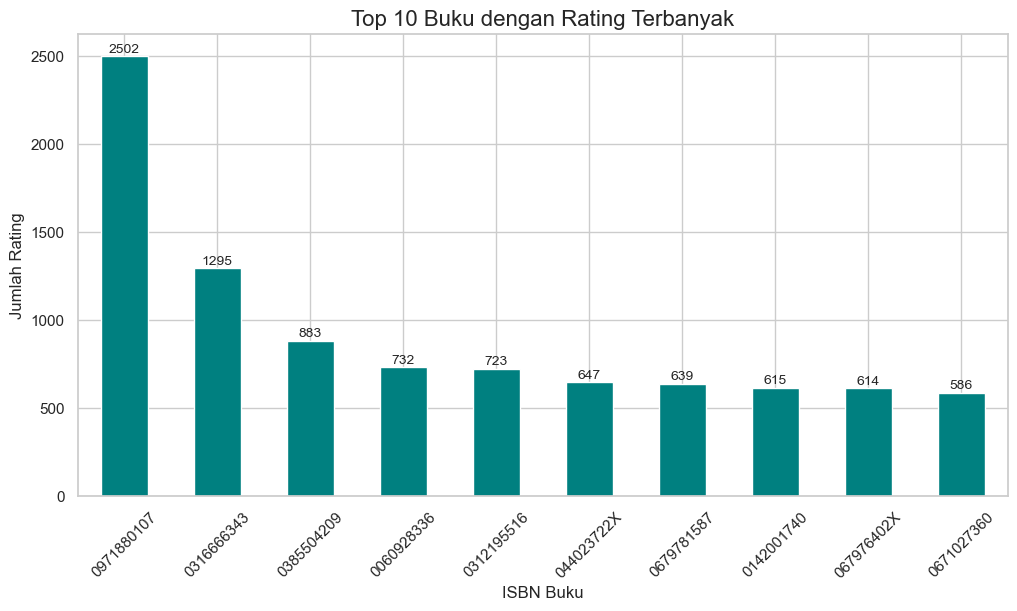

In [49]:
# Visualisasi jumlah rating per buku (Top 10 Buku dengan Rating Terbanyak)
top_rated_books = ratings.groupby('ISBN').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = top_rated_books.plot(kind='bar', color='teal')
plt.title('Top 10 Buku dengan Rating Terbanyak', fontsize=16)
plt.xlabel('ISBN Buku')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45)

# Menambahkan label total di atas setiap batang
for i, v in enumerate(top_rated_books):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


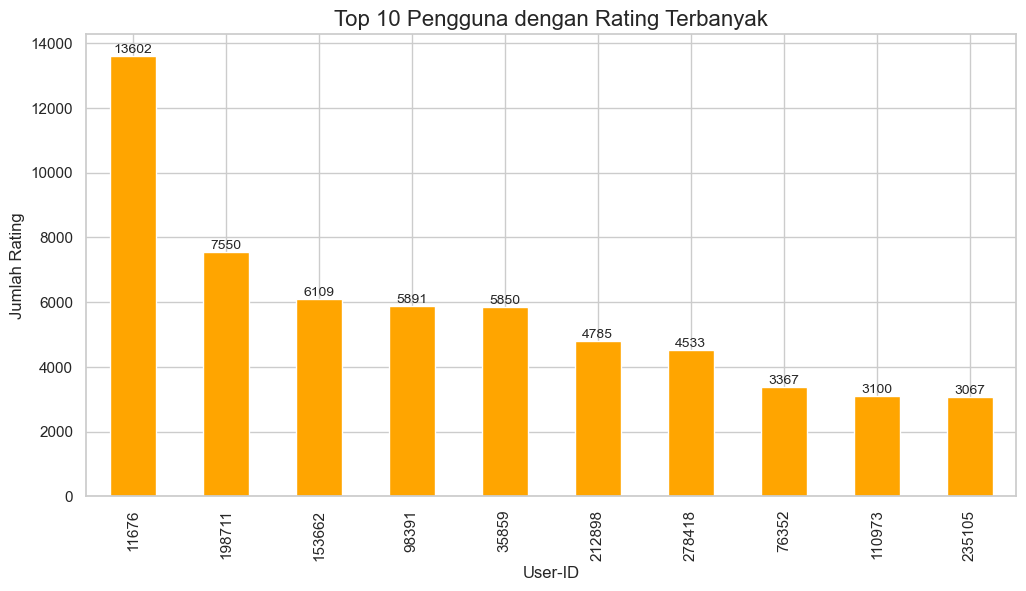

In [50]:
# Visualisasi distribusi User-ID (jumlah rating per user)
user_ratings_count = ratings.groupby('User-ID').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = user_ratings_count.plot(kind='bar', color='orange')
plt.title('Top 10 Pengguna dengan Rating Terbanyak', fontsize=16)
plt.xlabel('User-ID')
plt.ylabel('Jumlah Rating')

# Menambahkan label total di atas setiap batang
for i, v in enumerate(user_ratings_count):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


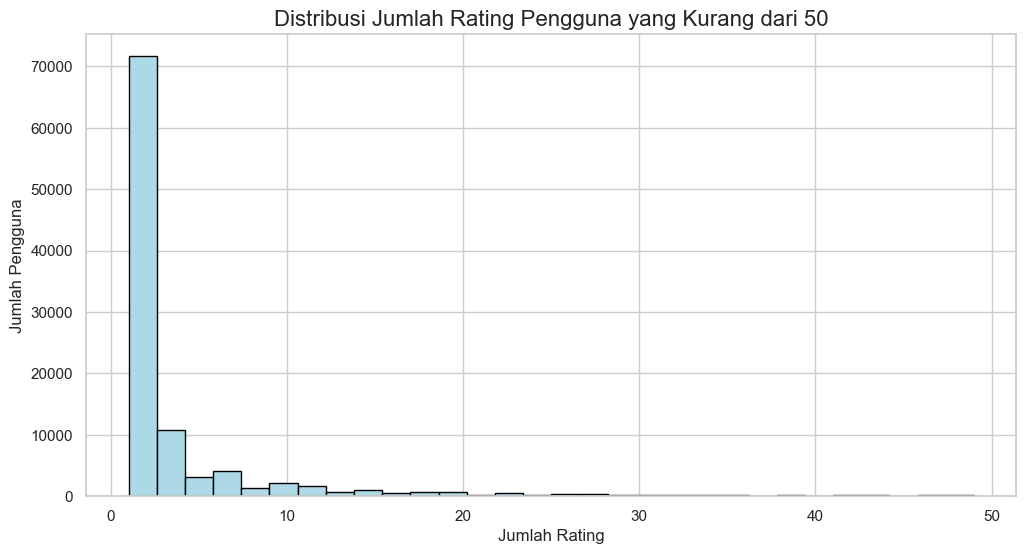

In [51]:
# Visualisasi distribusi User-ID (jumlah rating per user)
user_ratings_count = ratings.groupby('User-ID').size().sort_values(ascending=False)

# Menyaring pengguna yang memberikan rating kurang dari 50
user_ratings_less_than_50 = user_ratings_count[user_ratings_count < 50]

# Visualisasi distribusi jumlah rating per pengguna yang kurang dari 50 dalam bentuk histogram
plt.figure(figsize=(12,6))
plt.hist(user_ratings_less_than_50, bins=30, color='lightblue', edgecolor='black')
plt.title('Distribusi Jumlah Rating Pengguna yang Kurang dari 50', fontsize=16)
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

Pada sintaks ini, pertama-tama dilakukan pengelompokan data berdasarkan User-ID untuk menghitung jumlah rating yang diberikan oleh setiap pengguna. Kemudian, data yang diperoleh disortir berdasarkan jumlah rating dari yang terbanyak hingga yang paling sedikit.

Setelah itu, pengguna yang memberikan rating kurang dari 50 kali dipilih untuk dianalisis lebih lanjut. Visualisasi histogram kemudian dibuat untuk menunjukkan distribusi jumlah rating yang diberikan oleh pengguna yang memberikan kurang dari 50 rating.

Histogram ini menunjukkan bahwa sebagian besar pengguna memberikan sedikit rating, khususnya pengguna dengan hanya 1 atau 2 rating. Pengguna dengan jumlah rating rendah ini mendominasi distribusi, sementara hanya sebagian kecil pengguna yang memberikan banyak rating. Pengguna yang memberikan sedikit rating mungkin tidak memberikan gambaran yang cukup kuat tentang preferensi mereka, yang menjadi perhatian penting dalam pengembangan sistem rekomendasi, karena rekomendasi yang diberikan berdasarkan rating terbatas dapat kurang akurat.

Hal ini menjadi jelas jika saya membuat histogram yang sama dengan batas untuk pengguna dengan minimal 1000 ratings.

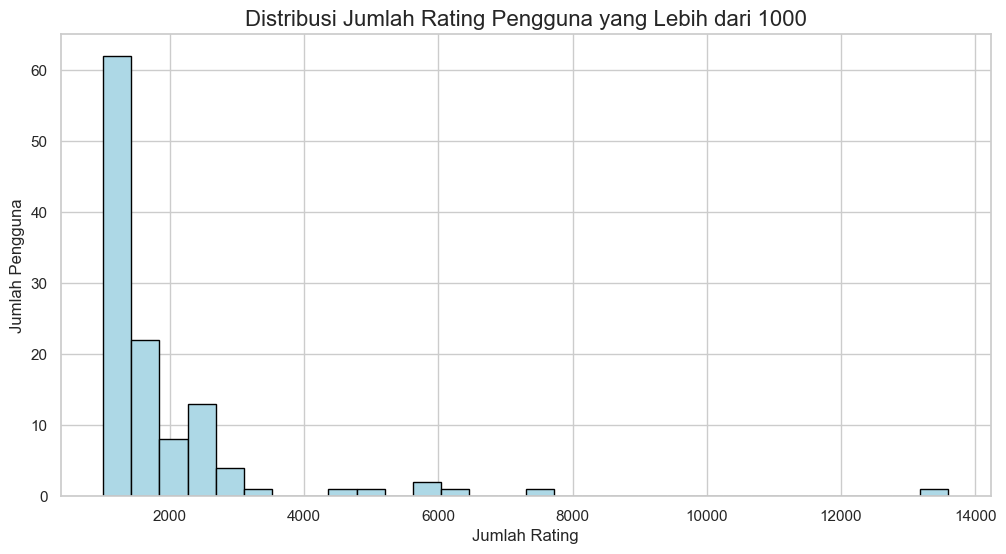

In [52]:
# Menyaring pengguna yang memberikan rating lebih dari 1000
user_ratings_more_than_1000 = user_ratings_count[user_ratings_count > 1000]

# Visualisasi distribusi jumlah rating per pengguna yang kurang dari 50 dalam bentuk histogram
plt.figure(figsize=(12,6))
plt.hist(user_ratings_more_than_1000, bins=30, color='lightblue', edgecolor='black')
plt.title('Distribusi Jumlah Rating Pengguna yang Lebih dari 1000', fontsize=16)
plt.xlabel('Jumlah Rating')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

Pada sintaks ini, saya pertama-tama menganalisis distribusi nilai rating pada dataset dengan menghitung jumlah kemunculan setiap rating menggunakan value_counts() dan mengurutkannya berdasarkan nilai rating (dari yang terkecil hingga terbesar). Selanjutnya, distribusi rating tersebut divisualisasikan menggunakan grafik batang (bar plot).

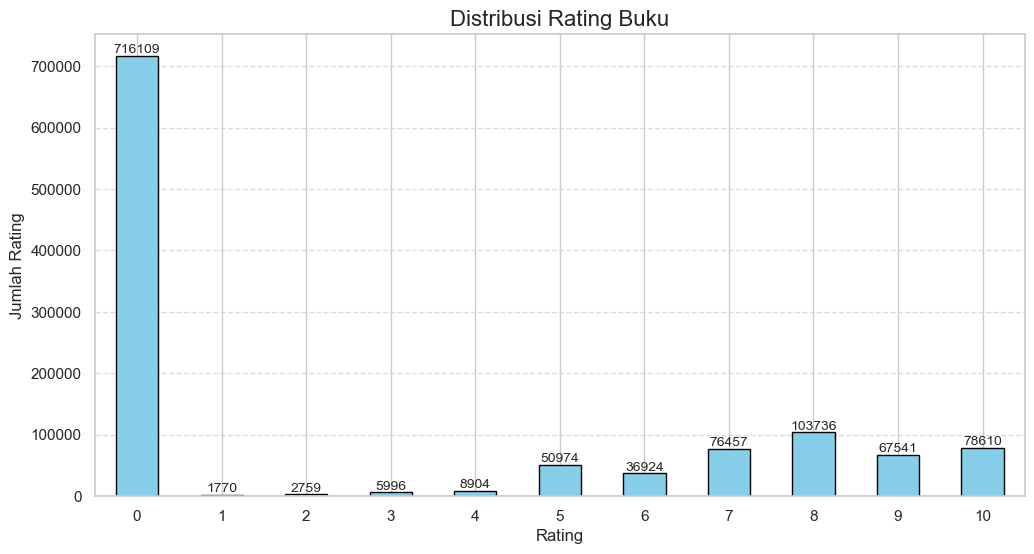

In [53]:
# Distribusi Book-Rating
rating_counts = ratings['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(12,6))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Rating Buku', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label total di atas setiap batang
for i, v in enumerate(rating_counts):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


Hasil visualisasi menunjukkan bahwa sebagian besar entri memiliki rating 0, yang dalam konteks ini diartikan sebagai rating implisit. Rating implisit berbeda dengan rating eksplisit karena rating 0 ini tidak menunjukkan penilaian yang eksplisit dari pengguna, melainkan sebuah interaksi (positif atau negatif) antara pengguna dan buku tersebut. Sebagai langkah pemodelan, saya hanya akan fokus pada rating eksplisit (nilai dari 1 hingga 10), dan oleh karena itu, entri dengan rating 0 akan dihapus.

Selain itu, untuk memberikan informasi lebih lengkap pada grafik, jumlah rating di atas setiap batang grafik juga ditambahkan dengan menggunakan fungsi plt.text(), yang menunjukkan total jumlah rating untuk setiap nilai rating yang diberikan. Dengan demikian, saya dapat dengan mudah memahami distribusi rating dalam dataset.

Sintaks dibawah ini memfilter rating eksplisit (nilai selain 0) dari dataset dan menghitung distribusi jumlah rating untuk setiap nilai rating (1-10). Hasilnya divisualisasikan dalam bentuk grafik batang, dengan sumbu x menunjukkan rating dan sumbu y menunjukkan jumlah rating yang diberikan.

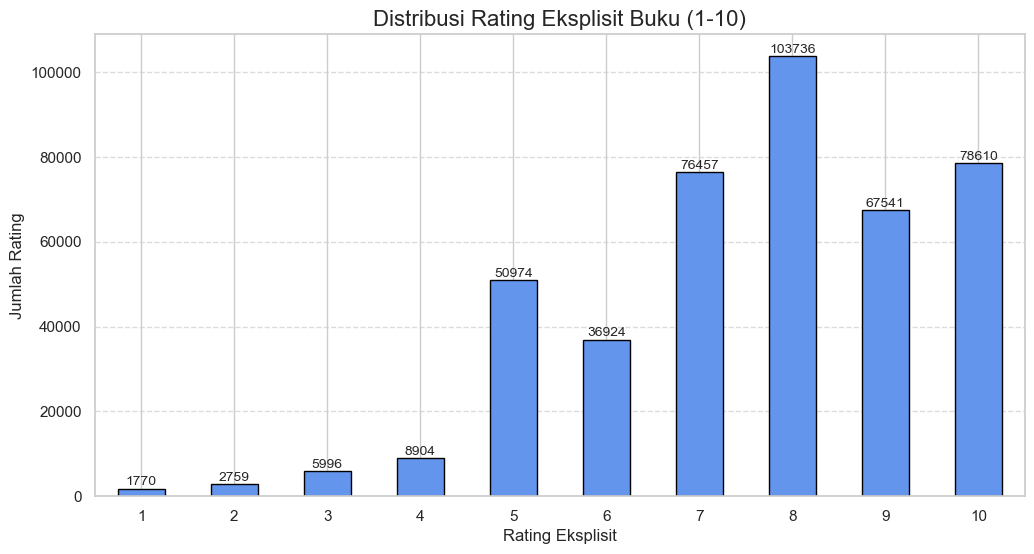

In [54]:
explicit_ratings = ratings[ratings['Book-Rating'] != 0]

# Visualize explicit ratings
explicit_rating_counts = explicit_ratings['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(12,6))
explicit_rating_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Distribusi Rating Eksplisit Buku (1-10)', fontsize=16)
plt.xlabel('Rating Eksplisit')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels to the bars
for i, v in enumerate(explicit_rating_counts):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

### Users Univariate Exploratory Data Analysis

In [55]:
print("Users Data:", users.shape)

Users Data: (278858, 3)


Total baris pada dataset books adalah 278858 dan total kolom adalah 3.

In [56]:
## Checking for null values
users.isnull().sum() 

User-ID          0
Location         0
Age         110762
dtype: int64

Terdapat nilai hilang pada kolom Age sebanyak 110762 data.

In [57]:
# Checking of duplicates 
users.duplicated().sum()

0

In [58]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Sintak ratings.info() memberikan gambaran tentang dataset ratings yang memiliki 278858 entri dan 3 kolom: User-ID (int64), Location (object), dan Age (float64). 

In [59]:
users[users['Age'].isnull()]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [60]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Berdasarkan hasil pengecekan nilai yang terdapat pada kolom 'Age', terdapat beberapa nilai yang tidak realistis, seperti usia lebih dari 80 atau kurang dari 10 tahun. Nilai usia seperti ini bisa dianggap sebagai outlier yang perlu ditangani agar tidak mempengaruhi analisis atau model yang dikembangkan.

### Ratings Data Preparation

Untuk menangani outlier ini, langkah yang diambil adalah mengganti nilai usia yang lebih besar dari 80 dan lebih kecil dari 10 dengan nilai rata-rata usia yang valid. Pertama, data yang memiliki usia antara 10 hingga 80 diambil untuk menghitung rata-ratanya. Kemudian, usia yang lebih besar dari 80 atau lebih kecil dari 10 diganti dengan nilai rata-rata yang sudah dihitung tersebut. Selain itu, nilai yang kosong (null) pada kolom usia juga diisi dengan rata-rata tersebut, dan akhirnya kolom usia diubah menjadi tipe data integer untuk konsistensi.

Dengan cara ini, nilai yang tidak realistis atau hilang pada kolom usia dapat diperbaiki tanpa mengubah distribusi usia secara signifikan.

In [61]:
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]

Langkah selanjutnya adalah menangani nilai outlier pada kolom usia dengan menggunakan data rata-rata usia. Jika usianya kurang dari 10 maka akan ganti dengan 35 dan jika usianya diatas 80 maka akan diganti dengan 35.

In [62]:
mean = round(required['Age'].mean())   
mean

35

In [63]:
users.loc[users['Age'] > 80, 'Age'] = mean    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = mean    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(mean)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

In [64]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [65]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [66]:
# Pisahkan kolom Location menjadi tiga kolom: City, Region, Country
split_location = users['Location'].str.split(',', expand=True)

# Isi nilai yang kosong (karena kurang dari 3 elemen) dengan NaN
split_location = split_location.fillna('')

# Berikan nama kolom City, Region, Country
users[['City', 'Region', 'Country']] = split_location.iloc[:, :3]

# Hapus spasi tambahan di awal dan akhir setiap kolom
users['City'] = users['City'].str.strip()
users['Region'] = users['Region'].str.strip()
users['Country'] = users['Country'].str.strip()

# Lihat hasilnya
users.drop(columns='Location', inplace=True)
users

,User-ID,Age,City,Region,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,35,portland,oregon,usa
278854,278855,50,tacoma,washington,united kingdom
278855,278856,35,brampton,ontario,canada
278856,278857,35,knoxville,tennessee,usa


Pada kode di atas, kolom 'Location' yang berisi informasi lokasi dalam format "kota, region, negara" dipisahkan menjadi tiga kolom terpisah: 'City', 'Region', dan 'Country'.

Berikut adalah langkah-langkah yang dilakukan:

1. Memisahkan kolom Location: Menggunakan fungsi str.split() untuk memisahkan nilai di kolom 'Location' berdasarkan koma, dan hasilnya disimpan dalam variabel split_location.
2. Mengisi nilai kosong: Jika ada baris yang hanya memiliki dua elemen (misalnya hanya ada kota dan negara), maka elemen ketiga (Region) diisi dengan string kosong.
3. Menamai kolom baru: Memberikan nama kolom 'City', 'Region', dan 'Country' berdasarkan hasil pemisahan.
4. Menghapus spasi ekstra: Menggunakan fungsi str.strip() untuk menghapus spasi tambahan di awal dan akhir setiap elemen di kolom baru.
5. Menghapus kolom Location: Menghapus kolom 'Location' yang sudah tidak diperlukan lagi.

Hasilnya adalah dataframe dengan kolom terpisah untuk 'City', 'Region', dan 'Country', mempermudah analisis lebih lanjut terhadap lokasi pengguna.

In [67]:
users.isnull().sum()

User-ID    0
Age        0
City       0
Region     0
Country    0
dtype: int64

In [68]:
empty_string_country = users[users.Country == ''].Country.count()
nan_country = users.Country.isnull().sum()
print(f'There are {empty_string_country} entries with empty strings, and {nan_country} NaN entries in the Country field')

There are 4614 entries with empty strings, and 0 NaN entries in the Country field


Kode di atas digunakan untuk menghitung jumlah entri dengan nilai kosong atau tidak terisi pada kolom 'Country' dalam dataframe users.

1. Menghitung entri dengan string kosong: Baris pertama (empty_string_country) menghitung jumlah entri di kolom 'Country' yang memiliki string kosong ('').
2. Menghitung entri dengan nilai NaN: Baris kedua (nan_country) menghitung jumlah entri di kolom 'Country' yang memiliki nilai NaN (Not a Number), yang menunjukkan nilai yang hilang atau tidak terisi.
3. Menampilkan hasil: Hasil kedua perhitungan tersebut dicetak dalam format yang menunjukkan jumlah entri kosong dan NaN di kolom 'Country'.

In [69]:
import numpy as np
users.Country.replace('', np.nan, inplace=True)

Kode di atas menggantikan nilai string kosong ('') di kolom 'Country' dalam dataframe users dengan nilai NaN (Not a Number) menggunakan fungsi replace() dari pandas. Hal ini dilakukan untuk menyamakan cara penanganan nilai yang hilang, sehingga entri dengan string kosong dapat dianggap sebagai nilai yang hilang (NaN) untuk analisis lebih lanjut. inplace=True memastikan perubahan dilakukan langsung pada dataframe users tanpa perlu membuat salinan baru.

In [70]:
users.isnull().sum()

User-ID       0
Age           0
City          0
Region        0
Country    4614
dtype: int64

In [71]:
# Mengisi nilai NaN pada kolom 'Country' dengan 'Other'
users['Country'] = users['Country'].fillna('Other')

Kode di atas mengisi nilai NaN yang ada pada kolom 'Country' dalam dataframe users dengan string 'Other'.

In [72]:
# Mengganti nilai 'n/a' pada kolom 'Region' dengan 'Other'
users['Region'] = users['Region'].replace('na', 'Other')

Kode di atas mengisi nilai na yang ada pada kolom 'Region' dalam dataframe users dengan string 'Other'.

In [73]:
users.isnull().sum()

User-ID    0
Age        0
City       0
Region     0
Country    0
dtype: int64

In [74]:
users["Country"].unique().tolist()

['usa',
 'russia',
 'portugal',
 'united kingdom',
 'canada',
 'spain',
 'australia',
 'brazil',
 'Other',
 'germany',
 'mexico',
 'china',
 'italy',
 'distrito federal',
 'france',
 'netherlands',
 'iraq',
 'finland',
 'new zealand',
 'india',
 'ghana',
 'switzerland',
 'slovenia',
 'iran',
 'peru',
 'bosnia and herzegovina',
 'vietnam',
 'sri lanka',
 'pakistan',
 'denmark',
 'belgium',
 'malaysia',
 'u.a.e',
 'turkey',
 'philippines',
 'greece',
 'colombia',
 'norway',
 'kuwait',
 'chile',
 'quit',
 'lj',
 'taiwan',
 'denmark"',
 'españa',
 'sweden',
 'argentina',
 'nigeria',
 'london',
 'bulgaria',
 'austria',
 'romania',
 'victoria',
 'singapore',
 'albania',
 'egypt',
 'tunisia',
 'uzbekistan',
 'qatar',
 'syria',
 'saudi arabia',
 'indonesia',
 'sudan',
 'british columbia',
 'missouri',
 'somewherein space',
 'poland',
 'thailand',
 'metropolitana',
 'ireland',
 'malaysia"',
 'venezuela',
 'paraguay',
 'mozambique',
 'morocco',
 'afghanistan',
 'estonia',
 'clackamas',
 'spain"'

Saya juga mengamati bahwa ada kata-kata "england" dan "united kingdom" yang sebenarnya merujuk pada hal yang sama, jadi saya hanya mempertahankan "england" dengan mengganti "United Kingdom". Saya melakukan hal yang sama untuk "united states of america" dan "usa", serta "l'italia" dan "italy".

In [75]:
users = users.replace(to_replace =["england, united kingdom","united kingdom"], value = "england",  regex=True)
users = users.replace(to_replace ="united states of america", value = "usa",  regex=True)
users = users.replace(to_replace ="l`italia", value = "italy",  regex=True)
users.Country.value_counts()

Country
usa                 139190
canada               21558
england              18472
germany              17022
spain                13096
                     ...  
hillsborough             1
my                       1
bourgogne                1
greece (=hellas)         1
england.                 1
Name: count, Length: 1083, dtype: int64

In [76]:
import re

# Fungsi untuk menghapus semua karakter khusus
def remove_special_characters(value):
    if isinstance(value, str):
        # Hanya menyisakan huruf, angka, dan spasi
        return re.sub(r'[^A-Za-z0-9\s]', '', value).strip()
    return value  # Jika bukan string, kembalikan nilai aslinya

# Terapkan pembersihan ke seluruh DataFrame
users = users.applymap(remove_special_characters)

Sintaks di atas mendefinisikan fungsi remove_special_characters yang menghapus semua karakter khusus (seperti tanda baca atau simbol) dari kolom yang berisi teks. Fungsi ini hanya mempertahankan huruf, angka, dan spasi. Fungsi ini diterapkan ke seluruh DataFrame users menggunakan applymap, sehingga setiap elemen dalam DataFrame yang merupakan string akan dibersihkan dari karakter-karakter khusus. Jika elemen tersebut bukan string, nilai asli akan dipertahankan.

In [77]:
users.Country.value_counts()

Country
usa                 139194
canada               21558
england              18491
germany              17052
spain                13206
                     ...  
otago                    1
19104                    1
mrida                    1
antigua  barbuda         1
hernando                 1
Name: count, Length: 969, dtype: int64

Selanjutnya adalah dilakukan visualisasi pada dataset Ratings.csv untuk memberikan insight dari setiap hasil visualisasi.

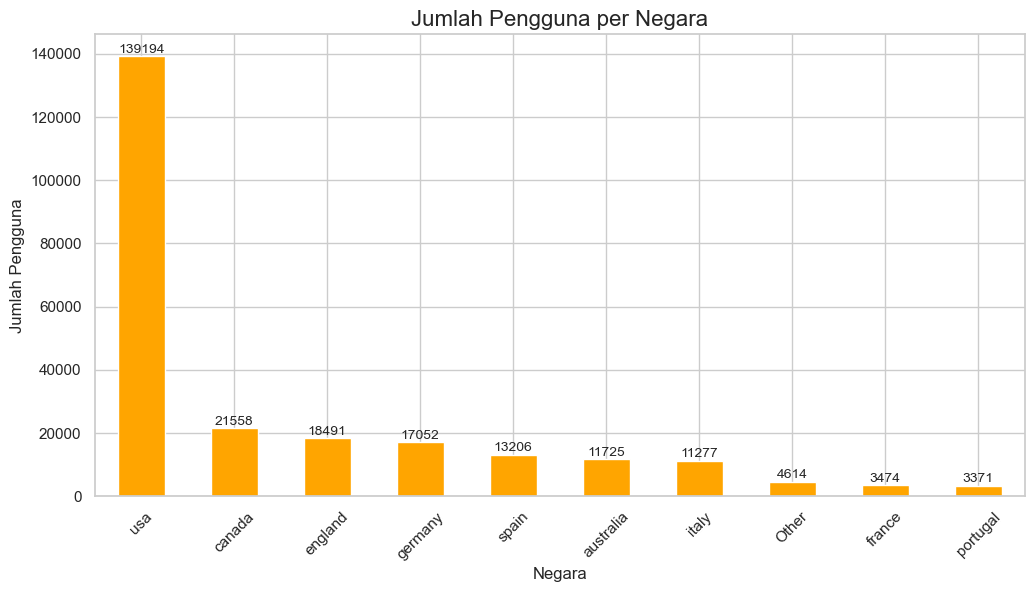

In [78]:
# Jumlah Pengguna per Negara
country_counts = users['Country'].value_counts().head(10)

# Plot jumlah pengguna per negara
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='orange')
plt.title('Jumlah Pengguna per Negara', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xticks(rotation=45)

# Adding labels to the bars
for i, v in enumerate(country_counts):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

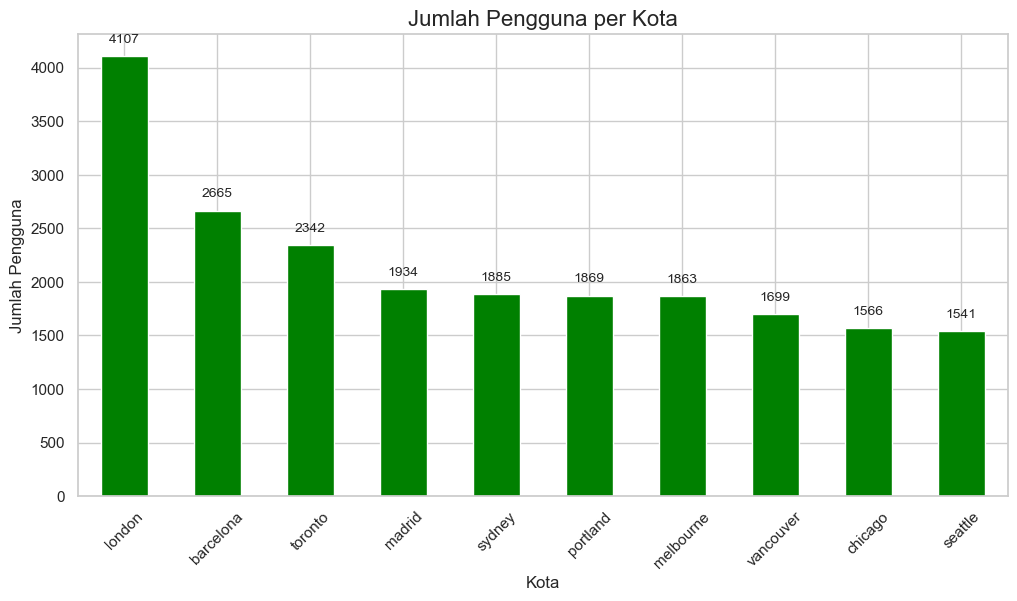

In [79]:
# Jumlah Pengguna per Kota
city_counts = users['City'].value_counts().head(10)

# Plot jumlah pengguna per kota
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='green')  # Menampilkan 20 kota teratas
plt.title('Jumlah Pengguna per Kota', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xticks(rotation=45)

# Adding labels to the bars
for i, v in enumerate(city_counts):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

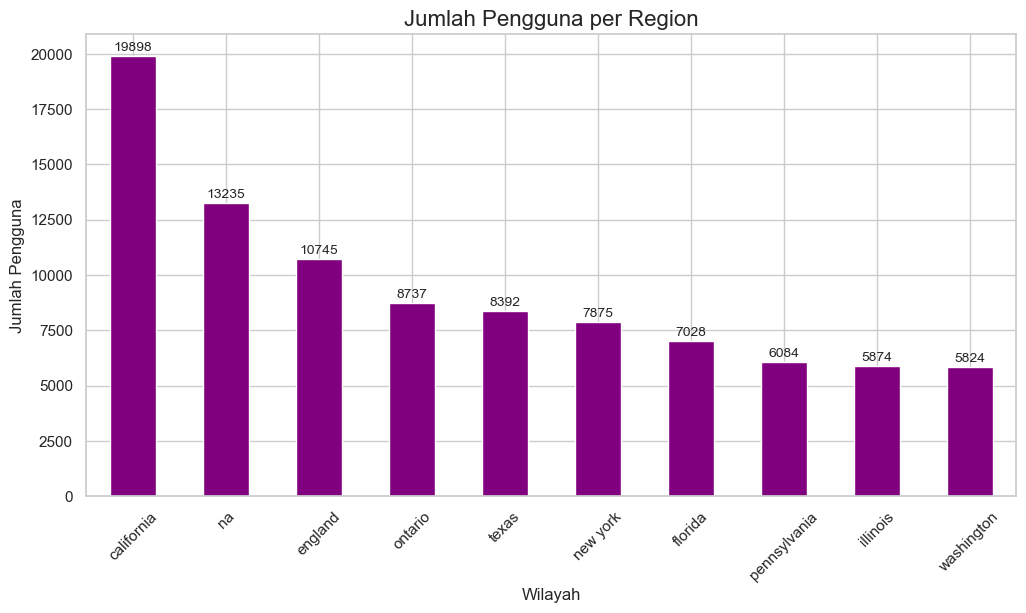

In [80]:
# Jumlah Pengguna per Wilayah (State/Region)
region_counts = users['Region'].value_counts().head(10)

# Plot jumlah pengguna per wilayah
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar', color='purple')  # Menampilkan 20 wilayah teratas
plt.title('Jumlah Pengguna per Region', fontsize=16)
plt.xlabel('Wilayah', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xticks(rotation=45)

# Adding labels to the bars
for i, v in enumerate(region_counts):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

## Popular Based Recommender System

### Merge data

Menggabungkan tabel books, users, dan ratings dalam Satu Tabel

In [81]:
# Joining books and user ratings into one table 
dataset = ratings.merge(books, on = 'ISBN')
dataset = dataset.merge(users, on = 'User-ID')
dataset = dataset[dataset['Book-Rating'] != 0]
dataset

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Region,Country
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23,cincinnati,ohio,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23,cincinnati,ohio,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23,cincinnati,ohio,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23,cincinnati,ohio,usa
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,23,cincinnati,ohio,usa
...,...,...,...,...,...,...,...,...,...,...,...
1031130,276442,2264032960,6,L'Apprenti du diable,Ellis Peters,2001,Editions 10/18,62,genve,genve,switzerland
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62,genve,genve,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,35,stuttgart,na,germany
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon & Schuster Children's Publishing,13,arlington heights,illinois,usa


## Popularity Based Recommender System

In [82]:
popular_df = dataset.groupby('Book-Title').agg(num_rating=('Book-Rating', 'count'),
                                                         avg_rating= ('Book-Rating','mean'))
popular_df = popular_df.reset_index()
popular_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


Sintaks di atas digunakan untuk membuat DataFrame baru bernama popular_df yang berisi informasi tentang buku yang paling populer. Prosesnya dilakukan dengan cara:

1. Mengelompokkan data berdasarkan 'Book-Title': Setiap buku dikelompokkan berdasarkan judul buku.
2. Menghitung jumlah rating ('num_rating'): Untuk setiap buku, dihitung berapa banyak rating yang diberikan.
3. Menghitung rata-rata rating ('avg_rating'): Untuk setiap buku, dihitung nilai rata-rata dari semua rating yang diberikan.
4. Reset Index: Mengembalikan indeks DataFrame agar menjadi urutan standar setelah agregasi.

Hasil akhir adalah sebuah DataFrame dengan dua kolom utama: jumlah rating (num_rating) dan rata-rata rating (avg_rating) untuk setiap buku.

In [83]:
popular_df.sort_values('num_rating',ascending=False)

,Book-Title,num_rating,avg_rating
110229,The Lovely Bones: A Novel,707,8.185290
132241,Wild Animus,581,4.390706
102703,The Da Vinci Code,494,8.439271
116196,The Secret Life of Bees,406,8.477833
111950,The Nanny Diaries: A Novel,393,7.437659
...,...,...,...
54565,Journeys with Elijah: Eight Tales of the Prophet,1,10.000000
54564,Journeys to Door County,1,8.000000
54562,Journeys of Simplicity: Traveling Light With T...,1,6.000000
54561,Journeys into Past Lives,1,8.000000


In [84]:
popular_df.describe()

,num_rating,avg_rating
count,135567.000000,135567.000000
mean,2.831382,7.522773
std,9.135691,1.706055
min,1.000000,1.000000
25%,1.000000,6.500000
50%,1.000000,8.000000
75%,2.000000,9.000000
max,707.000000,10.000000


Selanjutnya memfilter dan mengurutkan buku berdasarkan popularitas. Pertama, DataFrame popular_df disaring hanya untuk buku yang memiliki lebih dari 200 rating (num_rating > 200). Kemudian, buku-buku tersebut diurutkan berdasarkan nilai rata-rata rating (avg_rating) secara menurun (dari yang tertinggi). Dengan cara ini, hanya buku yang telah banyak dibaca dan memiliki rating tinggi yang akan ditampilkan, sehingga memberikan daftar buku yang paling populer berdasarkan rating dan jumlah pembaca.

In [85]:
# Popularity is based on the no of people read the book  ('num_raitng' > 200)
# It is based on the rating it got. 
popular = popular_df[popular_df['num_rating']>200].sort_values('avg_rating', ascending=False)
popular

,Book-Title,num_rating,avg_rating
45381,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
45385,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
45393,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
123681,To Kill a Mockingbird,267,8.977528
45403,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508
104949,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927
45374,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491
125564,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8.588000
36288,Fahrenheit 451,204,8.549020
116196,The Secret Life of Bees,406,8.477833


In [86]:
popular = popular.head(10)

In [87]:
# For the model deployment I need Book-title, Author, Image URL 
popular = popular.merge(books, on = 'Book-Title').drop_duplicates('Book-Title')[['Book-Title', 
                                                                                       'Book-Author',
                                                                                       'num_rating',
                                                                                      'avg_rating']]

Berikut merupakan 20 rekomendasi buku berdasarkan popularitas yang diurutkan berdasarkan nilai rata-rata rating (avg_rating).

In [88]:
popular

,Book-Title,Book-Author,num_rating,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,247,9.125506
2,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,211,9.047393
6,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,277,9.043321
9,To Kill a Mockingbird,Harper Lee,267,8.977528
17,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,315,8.936508
19,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,205,8.882927
28,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,326,8.840491
31,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,250,8.588000
34,Fahrenheit 451,Ray Bradbury,204,8.549020
47,The Secret Life of Bees,Sue Monk Kidd,406,8.477833


In [89]:
recommended_avg_rating = popular['avg_rating'].mean()
non_recommended_avg_rating = popular_df[~popular_df['Book-Title'].isin(popular['Book-Title'])]['avg_rating'].mean()

print(f"Average Rating of Recommended Books: {recommended_avg_rating}")
print(f"Average Rating of Non-Recommended Books: {non_recommended_avg_rating}")

Average Rating of Recommended Books: 8.495624292828987
Average Rating of Non-Recommended Books: 7.522629636301354


Hasil evaluasi diatas untuk mengukur seberapa relevan hasil rekomendasi berdasarkan popularitas. Disini saya membagikan perbandingan antara rata-rata dari 20 rekomendasi buku dengan rata-rata dari total buku yang sudah dilakukan penyaringan dengan lebih dari 200 rating yang sudah diberikan. Hasilnya rata-rata pada 20 rekomendasi buku lebih besar daripada rata-rata dari total buku dengan jumlah penilaian rating lebih dari 200. Artinya rekomendasi yang diberikan relevan. 

## Collaborative Filtering (Item Based Filtering)

In [90]:
dataset

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Region,Country
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23,cincinnati,ohio,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23,cincinnati,ohio,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23,cincinnati,ohio,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23,cincinnati,ohio,usa
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,23,cincinnati,ohio,usa
...,...,...,...,...,...,...,...,...,...,...,...
1031130,276442,2264032960,6,L'Apprenti du diable,Ellis Peters,2001,Editions 10/18,62,genve,genve,switzerland
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62,genve,genve,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,35,stuttgart,na,germany
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon & Schuster Children's Publishing,13,arlington heights,illinois,usa


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# Langkah 1: Filter pengguna dan buku terkenal
user_threshold = 50  # Ambang jumlah buku yang dibaca user
book_threshold = 50  # Ambang jumlah rating yang diterima buku

# Filter pengguna dengan interaksi lebih dari ambang batas
user_counts = dataset.groupby("User-ID").count()["Book-Title"]
active_users = user_counts[user_counts > user_threshold].index
filtered_dataset = dataset[dataset["User-ID"].isin(active_users)]

# Filter buku yang memiliki jumlah rating lebih dari ambang batas
book_counts = filtered_dataset.groupby("Book-Title").count()["Book-Rating"]
popular_books = book_counts[book_counts > book_threshold].index
final_dataset = filtered_dataset[filtered_dataset["Book-Title"].isin(popular_books)]
final_dataset

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Region,Country
48,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,34,strafford,missouri,usa
49,6543,0446610038,9,1st to Die: A Novel,James Patterson,2002,Warner Vision,34,strafford,missouri,usa
56,6543,0142001740,9,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,34,strafford,missouri,usa
488,10314,0446310786,9,To Kill a Mockingbird,Harper Lee,1988,Little Brown & Company,35,beaverton,oregon,usa
496,10314,0316601950,8,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,35,beaverton,oregon,usa
...,...,...,...,...,...,...,...,...,...,...,...
850753,227250,0446612790,10,2nd Chance,James Patterson,2003,Warner Vision,32,rhame,north dakota,usa
857035,4385,0440221471,10,The Runaway Jury,JOHN GRISHAM,1997,Dell,33,albq,new mexico,usa
875293,130482,0151008116,7,Life of Pi,Yann Martel,2002,Harcourt,54,earth,,universe
875315,130482,0671027352,7,Angels &amp; Demons,Dan Brown,2000,Atria,54,earth,,universe


In [92]:
final_dataset.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Age', 'City', 'Region', 'Country'],
      dtype='object')

Sintaks ini melakukan penyaringan dataset untuk keperluan Collaborative Filtering dengan Item Based Filtering. Pertama, pengguna yang memberikan rating pada lebih dari 50 buku disaring untuk memastikan hanya pengguna aktif yang dipertimbangkan. Kemudian, buku yang memiliki lebih dari 20 rating juga disaring, sehingga hanya buku yang populer yang digunakan. Hasil akhirnya adalah dataset yang hanya mencakup interaksi antara pengguna aktif dan buku populer, yang siap digunakan untuk analisis lebih lanjut atau untuk membuat rekomendasi berbasis kesamaan antara pengguna dan buku.

In [93]:
# Langkah 2: Buat Pivot Table
pt = final_dataset.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")
pt.fillna(0, inplace=True)
pt

User-ID,254,638,1424,1733,2033,2110,2276,2766,2891,2977,...,273718,273979,274004,274061,274301,275970,276680,277427,278137,278188
Book-Title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,9.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Time to Kill,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angels &amp; Demons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
Bridget Jones's Diary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dreamcatcher,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
Fahrenheit 451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tujuan dari pembuatan pivot table ini adalah untuk menyusun data dalam format yang memudahkan analisis rekomendasi buku. Dengan mengonversi data menjadi tabel yang menghubungkan judul buku dengan pengguna serta rating yang diberikan, saya dapat menganalisis pola preferensi pengguna terhadap berbagai buku. Ini memudahkan perhitungan similarity (kesamaan) antar buku untuk sistem rekomendasi berbasis collaborative filtering, seperti menghitung cosine similarity untuk memberikan rekomendasi buku kepada pengguna berdasarkan buku yang telah mereka beri rating.

In [94]:
# Langkah 3: Hitung Cosine Similarity
similarity_score = cosine_similarity(pt)
similarity_score

array([[1.        , 0.25299758, 0.11272674, ..., 0.21266811, 0.10430396,
        0.05303521],
       [0.25299758, 1.        , 0.17192073, ..., 0.24116354, 0.08438861,
        0.07392778],
       [0.11272674, 0.17192073, 1.        , ..., 0.17007721, 0.11992798,
        0.05636281],
       ...,
       [0.21266811, 0.24116354, 0.17007721, ..., 1.        , 0.08491208,
        0.09224087],
       [0.10430396, 0.08438861, 0.11992798, ..., 0.08491208, 1.        ,
        0.06368457],
       [0.05303521, 0.07392778, 0.05636281, ..., 0.09224087, 0.06368457,
        1.        ]])

Sintaks diaatas menghitung cosine similarity antara berbagai buku berdasarkan rating yang diberikan oleh pengguna.

In [95]:
# Langkah 4: Fungsi untuk merekomendasikan buku
def recommend_books(book_name, pt, similarity_score, n=10):
    if book_name not in pt.index:
        return "Buku tidak ditemukan dalam data."
    
    index = np.where(pt.index == book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:n+1]

    recommendations = []
    for i in similar_books:
        recommendations.append(pt.index[i[0]])
    
    return recommendations

Sintaks di atas mendefinisikan fungsi recommend_books yang bertujuan untuk memberikan rekomendasi buku berdasarkan buku yang dimasukkan oleh pengguna.

In [96]:
# Contoh penggunaan
book_name = "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"
recommendations = recommend_books(book_name, pt, similarity_score, n=10)

print(f"Rekomendasi untuk buku '{book_name}':")
for idx, rec in enumerate(recommendations, 1):
    print(f"{idx}. {rec}")

Rekomendasi untuk buku 'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))':
1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Prisoner of Azkaban (Book 3)
3. Harry Potter and the Goblet of Fire (Book 4)
4. Harry Potter and the Order of the Phoenix (Book 5)
5. A Time to Kill
6. The Joy Luck Club
7. Bridget Jones's Diary
8. The Firm
9. Fahrenheit 451
10. The Client


Sintaks di atas adalah contoh penggunaan dari fungsi recommend_books yang telah dibuat sebelumnya dengan memberikan 10 rekomendasi buku setelah membaca Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

In [97]:
# Mengevaluasi relevansi berdasarkan penulis
author = dataset[dataset['Book-Title'] == book_name]['Book-Author'].iloc[0]
relevant_books = 0
for book_title in recommendations:
    book_author = dataset[dataset['Book-Title'] == book_title]['Book-Author'].iloc[0]
    if book_author == author:
        relevant_books += 1

# Menghitung presisi
precision = relevant_books / len(recommendations)

# Menampilkan hasil
print(f"Jumlah buku relevan: {relevant_books}")
print(f"Presisi: {precision:.2f}")

Jumlah buku relevan: 4
Presisi: 0.40


In [98]:
# Mencari penulis buku berdasarkan judul
book_name = "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"

# Mencari penulis dari dataset
author = final_dataset[final_dataset['Book-Title'] == book_name]['Book-Author'].iloc[0]

# Mencari buku-buku lain yang ditulis oleh penulis yang sama
books_by_author = final_dataset[final_dataset['Book-Author'] == author]['Book-Title'].unique()

print(f"Buku-buku yang ditulis oleh {author}:")
for idx, book in enumerate(books_by_author, 1):
    print(f"{idx}. {book}")


Buku-buku yang ditulis oleh J. K. Rowling:
1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Sorcerer's Stone (Book 1)
3. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
4. Harry Potter and the Order of the Phoenix (Book 5)
5. Harry Potter and the Prisoner of Azkaban (Book 3)
6. Harry Potter and the Goblet of Fire (Book 4)


In [99]:
# Langkah 4: Mengevaluasi relevansi berdasarkan penulis dalam top-k rekomendasi
relevant_books = 0
for book_title in recommendations:
    if book_title in books_by_author:
        relevant_books += 1

# Langkah 5: Menghitung recall
recall = relevant_books / len(books_by_author)

# Menampilkan hasil
print(f"Jumlah buku relevan dalam top-k rekomendasi: {relevant_books}")
print(f"Jumlah buku relevan yang tersedia: {len(books_by_author)}")
print(f"Recall: {recall:.2f}")

Jumlah buku relevan dalam top-k rekomendasi: 4
Jumlah buku relevan yang tersedia: 6
Recall: 0.67


## Content Based Filtering

### Berdasarkan Popularitas Judul Buku

Pada langkah pertama Content-Based Filtering ini, tujuan utamanya adalah memfilter buku-buku yang populer berdasarkan jumlah rating yang diterima. Pertama, dihitung jumlah rating untuk setiap buku menggunakan groupby dan fungsi transform('count') pada kolom Book-Rating, yang menghitung berapa banyak rating yang diterima setiap buku berdasarkan ISBN-nya. Setelah itu, buku yang memiliki jumlah rating lebih besar atau sama dengan ambang batas yang telah ditentukan (misalnya 80 rating) dipilih sebagai buku populer. Buku-buku ini kemudian disimpan dalam variabel popular_books dan indeksnya di-reset untuk mempermudah analisis lebih lanjut. Langkah ini memastikan hanya buku yang benar-benar populer yang dipertimbangkan dalam rekomendasi berdasarkan rating pengguna.

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Langkah 1: Filter buku populer berdasarkan rating (buku yang memiliki banyak rating)
popularity_threshold = 80  # Tentukan ambang batas jumlah rating untuk buku populer
dataset['Total-Ratings'] = dataset.groupby('ISBN')['Book-Rating'].transform('count')  # Menghitung jumlah rating per buku
popular_books = dataset[dataset['Total-Ratings'] >= popularity_threshold]  # Memfilter buku populer
popular_books = popular_books.reset_index(drop=True)
popular_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Region,Country,Total-Ratings
0,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,34,strafford,missouri,usa,85
1,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,34,strafford,missouri,usa,164
2,6543,0446610038,9,1st to Die: A Novel,James Patterson,2002,Warner Vision,34,strafford,missouri,usa,177
3,6543,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,34,strafford,missouri,usa,134
4,6543,0142001740,9,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,34,strafford,missouri,usa,307
...,...,...,...,...,...,...,...,...,...,...,...,...
31043,223009,0684801523,9,The Great Gatsby,F. Scott Fitzgerald,1995,Scribner,17,nashville,indiana,usa,106
31044,231944,0684801523,8,The Great Gatsby,F. Scott Fitzgerald,1995,Scribner,20,bethesda,maryland,usa,106
31045,245009,0684801523,8,The Great Gatsby,F. Scott Fitzgerald,1995,Scribner,24,minneapolis,minnesota,usa,106
31046,264121,0684801523,7,The Great Gatsby,F. Scott Fitzgerald,1995,Scribner,22,fresno,california,usa,106


Pada langkah kedua, digunakan TfidfVectorizer untuk membuat matriks TF-IDF berdasarkan judul buku (Book-Title). TfidfVectorizer mengubah teks (judul buku) menjadi representasi numerik yang dapat digunakan untuk analisis lebih lanjut, dengan memberikan bobot pada kata-kata berdasarkan seberapa sering kata tersebut muncul dalam satu dokumen (judul buku) dan seberapa sering kata tersebut muncul di seluruh korpus data. Parameter ngram_range=(1, 2) memungkinkan ekstraksi unigram (kata tunggal) dan bigram (kombinasi dua kata). min_df=1 berarti setiap kata yang muncul setidaknya satu kali akan dipertimbangkan, dan stop_words='english' mengabaikan kata-kata umum dalam bahasa Inggris (seperti "the", "and", dll.). Hasilnya adalah matriks TF-IDF dengan dimensi yang dapat diakses menggunakan shape, yang menunjukkan jumlah fitur (kata unik dan pasangan kata) dan jumlah buku yang diproses.

In [101]:
# Langkah 2: Membuat TF-IDF Matrix berdasarkan Book-Title
tf = TfidfVectorizer(ngram_range=(1, 2), min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_books['Book-Title'])
tfidf_matrix.shape

(31048, 905)

Pada langkah ketiga, dilakukan perhitungan cosine similarity antar buku menggunakan matriks TF-IDF yang telah dibuat sebelumnya. Pertama, matriks TF-IDF dinormalisasi dengan mengubah tipe data matriks menjadi np.float32 untuk memastikan komputasi yang lebih efisien. Kemudian, cosine_similarity digunakan untuk menghitung kesamaan antara buku-buku berdasarkan vektor fitur TF-IDF mereka. Hasilnya adalah matriks yang berisi nilai-nilai cosine similarity antara setiap pasangan buku, di mana nilai mendekati 1 menunjukkan kesamaan yang tinggi dan nilai mendekati 0 menunjukkan kesamaan yang rendah. Matriks ini menggambarkan seberapa mirip judul buku satu dengan yang lainnya berdasarkan konten teks mereka.

In [102]:
# Langkah 3: Menghitung Cosine Similarity antar Buku
normalized_df = tfidf_matrix.astype(np.float32)  # Normalisasi matrix
cosine_similarities = cosine_similarity(normalized_df, normalized_df)  # Menghitung cosine similarity
cosine_similarities

array([[0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.99999994, 0.99999994,
        0.99999994],
       [0.        , 0.        , 0.        , ..., 0.99999994, 0.99999994,
        0.99999994],
       [0.        , 0.        , 0.        , ..., 0.99999994, 0.99999994,
        0.99999994]], dtype=float32)

Fungsi recommend_books ini digunakan untuk memberikan rekomendasi buku berdasarkan judul buku yang dipilih oleh pengguna. Langkah-langkahnya adalah sebagai berikut:

1. Mencari ISBN Buku: Fungsi ini mencari ISBN buku yang dipilih dalam dataset. Jika buku tidak ditemukan, maka fungsi akan mencetak pesan error dan keluar.
2. Menemukan Indeks Buku: Indeks buku yang dipilih diambil berdasarkan ISBN.
3. Mencari Buku Mirip: Berdasarkan indeks buku, fungsi ini mencari buku-buku yang paling mirip menggunakan nilai cosine similarity yang telah dihitung sebelumnya. Buku-buku yang memiliki nilai cosine similarity tertinggi akan dipilih.
4. Menampilkan Rekomendasi: Buku yang memiliki kesamaan tertinggi akan ditampilkan sebagai rekomendasi (dengan jumlah yang ditentukan dalam parameter number).

Fungsi ini memberikan rekomendasi buku berdasarkan konten yang mirip, seperti yang tercermin dari judul buku yang dipilih.

In [103]:
# Langkah 4: Fungsi Rekomendasi Buku
def recommend_books(bookName, number=10):
    # Cari ISBN dari buku yang dipilih
    try:
        isbn = popular_books.loc[popular_books['Book-Title'] == bookName].reset_index(drop=True).iloc[0]['ISBN']
    except IndexError:
        print(f"Buku '{bookName}' tidak ditemukan dalam dataset.")
        return []
    
    content = []
    # Temukan indeks buku yang dipilih
    idx = popular_books.index[popular_books['ISBN'] == isbn].tolist()[0]
    
    # Temukan buku-buku yang paling mirip berdasarkan cosine similarity
    similar_indices = cosine_similarities[idx].argsort()[::-1]  # Urutkan berdasarkan similarity tertinggi
    
    similar_items = []
    for i in similar_indices:
        if popular_books['Book-Title'][i] != bookName and popular_books['Book-Title'][i] not in similar_items and len(similar_items) < number:
            similar_items.append(popular_books['Book-Title'][i])
            content.append(popular_books['Book-Title'][i])

    # Menampilkan buku-buku yang direkomendasikan
    print(f"Recommended Books based on '{bookName}':\n")
    for book in similar_items:
        print(book)

    return similar_items

bookName = "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"  # Ganti dengan judul buku yang dipilih
recommended_books = recommend_books(bookName)

Recommended Books based on 'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))':

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)
From Potter's Field
Big Stone Gap: A Novel (Ballantine Reader's Circle)
Where the Heart Is (Oprah's Book Club (Paperback))
She's Come Undone (Oprah's Book Club (Paperback))
The Book of Ruth (Oprah's Book Club (Paperback))


In [104]:
# Mengevaluasi relevansi berdasarkan penulis
author = popular_books[popular_books['Book-Title'] == bookName]['Book-Author'].iloc[0]
author

'J. K. Rowling'

In [105]:
relevant_books = 0
for book_title in recommended_books:
    book_author = popular_books[popular_books['Book-Title'] == book_title]['Book-Author'].iloc[0]
    if book_author == author:
        relevant_books += 1

# Menghitung presisi
precision = relevant_books / len(recommendations)

# Menampilkan hasil
print(f"Jumlah buku relevan: {relevant_books}")
print(f"Presisi: {precision:.2f}")

Jumlah buku relevan: 5
Presisi: 0.50


In [106]:
# Mencari buku-buku lain yang ditulis oleh penulis yang sama
books_by_author = popular_books[popular_books['Book-Author'] == author]['Book-Title'].unique()

print(f"Buku-buku yang ditulis oleh {author}:")
for idx, book in enumerate(books_by_author, 1):
    print(f"{idx}. {book}")


Buku-buku yang ditulis oleh J. K. Rowling:
1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Sorcerer's Stone (Book 1)
3. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
4. Harry Potter and the Prisoner of Azkaban (Book 3)
5. Harry Potter and the Goblet of Fire (Book 4)
6. Harry Potter and the Order of the Phoenix (Book 5)


In [107]:
# Langkah 4: Mengevaluasi relevansi berdasarkan penulis dalam top-k rekomendasi
relevant_books = 0
for book_title in recommended_books:
    if book_title in books_by_author:
        relevant_books += 1

# Langkah 5: Menghitung recall
recall = relevant_books / len(books_by_author)

# Menampilkan hasil
print(f"Jumlah buku relevan dalam top-k rekomendasi: {relevant_books}")
print(f"Jumlah buku relevan yang tersedia: {len(books_by_author)}")
print(f"Recall: {recall:.2f}")

Jumlah buku relevan dalam top-k rekomendasi: 5
Jumlah buku relevan yang tersedia: 6
Recall: 0.83


### Berdasarkan Rata-rata Rating Buku

Langkah pertama ini berfokus pada pembuatan DataFrame yang mengelompokkan buku berdasarkan judul (Book-Title). Kemudian, dihitung dua hal penting:

1. num_rating: Jumlah rating yang diberikan untuk setiap buku, menggunakan fungsi count pada kolom Book-Rating.
2. avg_rating: Rata-rata rating untuk setiap buku, menggunakan fungsi mean pada kolom Book-Rating.

Data ini kemudian direset indeksnya untuk memudahkan akses, dan hasil akhirnya adalah DataFrame yang berisi judul buku, jumlah rating yang diterima, dan rata-rata rating untuk setiap buku. Data ini dapat digunakan untuk mengidentifikasi buku-buku populer atau berkinerja baik berdasarkan rating yang diterima.

In [108]:
# Langkah 1: Filter Buku Berdasarkan Popularitas dan Rata-rata Rating
popular_df = dataset.groupby('Book-Title').agg(num_rating=('Book-Rating', 'count'),
                                               avg_rating=('Book-Rating', 'mean'))
popular_df = popular_df.reset_index()
popular_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


Pada langkah ini, pertama dilakukan filter pada popular_df untuk hanya memilih buku yang memiliki lebih dari 50 rating. Kemudian, DataFrame diurutkan berdasarkan avg_rating (rata-rata rating) secara menurun agar buku dengan rating tertinggi berada di atas.

Setelah itu, popular_df digabungkan dengan dataset asli berdasarkan kolom Book-Title menggunakan pd.merge(), yang memungkinkan untuk mendapatkan detail tambahan dari buku-buku tersebut yang ada pada dataset asli (seperti ISBN, pengarang, dll). Buku yang memiliki judul yang sama akan dihapus duplikatnya menggunakan drop_duplicates('Book-Title'). Hasilnya adalah DataFrame popular_books yang berisi buku-buku populer dengan lebih dari 50 rating, diurutkan berdasarkan rata-rata rating tertinggi.

In [109]:
# Hanya pilih buku dengan jumlah rating > 50
popular_df = popular_df[popular_df['num_rating'] > 50]
popular_df = popular_df.sort_values('avg_rating', ascending=False).reset_index(drop=True)

# Gabungkan dengan dataset asli untuk mendapatkan detail tambahan
popular_books = pd.merge(popular_df, dataset, on='Book-Title').drop_duplicates('Book-Title')
popular_books = popular_books.reset_index(drop=True)
popular_books

,Book-Title,num_rating,avg_rating,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Age,City,Region,Country,Total-Ratings
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,138543,0345339711,10,J.R.R. TOLKIEN,1986,Del Rey,21,mesquite,texas,usa,83
1,"The Return of the King (The Lord of the Rings,...",103,9.213592,138543,0345339738,10,J.R.R. TOLKIEN,1986,Del Rey,21,mesquite,texas,usa,77
2,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,195374,0439139597,10,J. K. Rowling,2000,Scholastic,51,navarre,florida,usa,137
3,The Little Prince,90,9.111111,138543,0156528207,9,Antoine de Saint-ExupÃ©ry,1968,Harcourt,21,mesquite,texas,usa,51
4,Charlotte's Web (Trophy Newbery),68,9.073529,244420,0064400557,10,E. B. White,1974,HarperTrophy,35,kenmore,,Other,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Songs in Ordinary Time (Oprah's Book Club (Pap...,66,6.530303,187863,0140244824,7,Mary McGarry Morris,1996,Penguin Books,33,greenwood,south carolina,usa,66
622,4 Blondes,52,5.653846,260897,0451203895,6,Candace Bushnell,2002,Signet Book,25,chicago,illinois,usa,52
623,Isle of Dogs,106,5.433962,98391,039914739X,9,Patricia Daniels Cornwell,2001,Putnam Publishing Group,52,morrow,georgia,usa,30
624,Four Blondes,66,5.393939,11676,080213825X,3,Candace Bushnell,2001,Grove Press,35,na,na,na,54


Pada langkah ini, dilakukan pembuatan matriks TF-IDF (Term Frequency-Inverse Document Frequency) berdasarkan kolom Book-Title dari DataFrame popular_books. Fungsi TfidfVectorizer digunakan untuk mengonversi teks judul buku menjadi representasi numerik. Parameter yang digunakan antara lain:

- ngram_range=(1, 2): Menentukan bahwa n-gram yang digunakan adalah unigrams (kata tunggal) dan bigrams (dua kata berturut-turut).
- min_df=1: Mengizinkan kata yang muncul dalam satu dokumen atau lebih untuk tetap dipertimbangkan.
- stop_words='english': Menghapus kata-kata umum dalam bahasa Inggris yang tidak memberi informasi (misalnya "the", "and", "is").

Matriks tfidf_matrix yang dihasilkan menggambarkan relevansi setiap kata dalam judul buku terhadap koleksi buku yang ada. tfidf_matrix.shape menunjukkan ukuran dari matriks tersebut, yaitu jumlah baris (jumlah buku) dan kolom (jumlah fitur/terminologi yang ditemukan).

In [110]:
# Langkah 2: Membuat TF-IDF Matrix Berdasarkan Judul Buku
tf = TfidfVectorizer(ngram_range=(1, 2), min_df=1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_books['Book-Title'])
tfidf_matrix.shape

(626, 2027)

Pada langkah ini, dihitung cosine similarity antar buku berdasarkan matriks TF-IDF yang telah dibuat. Fungsi cosine_similarity digunakan untuk mengukur sejauh mana dua buku (dalam hal ini, dua judul buku) memiliki kesamaan dalam konten teksnya, berdasarkan vektor representasi yang dihasilkan dari matriks TF-IDF.

Cosine similarity mengukur sudut antara dua vektor dalam ruang vektor, dengan nilai berkisar antara 0 hingga 1, di mana 1 menunjukkan kesamaan sempurna dan 0 menunjukkan tidak ada kesamaan. Matriks cosine_similarities yang dihasilkan berisi nilai-nilai similarity antar setiap pasangan buku, di mana setiap elemen (i, j) dalam matriks menunjukkan tingkat kesamaan antara buku i dan buku j berdasarkan judulnya.

In [111]:
# Langkah 3: Menghitung Cosine Similarity Antar Buku
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_similarities

array([[1.        , 0.43463892, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43463892, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [112]:
# Langkah 4: Fungsi Rekomendasi Buku
def recommend_books(bookName, number=10):
    try:
        # Cari indeks buku yang dipilih
        idx = popular_books.index[popular_books['Book-Title'] == bookName].tolist()[0]
    except IndexError:
        print(f"Buku '{bookName}' tidak ditemukan dalam daftar buku populer.")
        return pd.DataFrame(columns=["Book-Title", "Book-Author", "avg_rating"])
    
    # Cari buku-buku yang paling mirip berdasarkan cosine similarity
    similar_indices = cosine_similarities[idx].argsort()[::-1]
    
    # Simpan hasil rekomendasi dalam list
    similar_items = []
    for i in similar_indices:
        if popular_books['Book-Title'].iloc[i] != bookName and \
           popular_books['Book-Title'].iloc[i] not in similar_items and \
           len(similar_items) < number:
            similar_items.append(i)

    # Buat dataframe hasil rekomendasi
    recommendations = popular_books.iloc[similar_items][["Book-Title", "Book-Author", "avg_rating"]]
    
    # Urutkan hasil berdasarkan avg_rating secara menurun
    recommendations = recommendations.sort_values(by='avg_rating', ascending=False).reset_index(drop=True)
    
    return recommendations

# Contoh: Rekomendasi berdasarkan judul buku
bookName = "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"  # Ganti dengan judul buku yang dipilih
recommendations = recommend_books(bookName)
recommendations

,Book-Title,Book-Author,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,9.125506
1,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,9.062500
2,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,9.047393
3,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,9.043321
4,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,8.840491
5,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,8.142373
6,From Potter's Field,Patricia Daniels Cornwell,7.717172
7,Big Stone Gap: A Novel (Ballantine Reader's Ci...,Adriana Trigiani,7.500000
8,The Stone Diaries,Carol Shields,7.450704
9,The Shelters of Stone (Earth's Children Series...,JEAN M. AUEL,7.258621


Fungsi recommend_books di atas digunakan untuk memberikan rekomendasi buku berdasarkan judul buku yang dipilih. Prosesnya dimulai dengan mencari indeks buku yang dipilih dalam daftar buku populer. Setelah itu, dihitung buku-buku yang paling mirip menggunakan nilai cosine similarity yang telah dihitung sebelumnya. Buku-buku yang mirip dengan buku yang dipilih akan disortir berdasarkan rating rata-rata (avg_rating) secara menurun, dan hanya buku-buku dengan rating terbaik yang akan dimasukkan dalam rekomendasi. Fungsi ini mengembalikan dataframe yang berisi daftar buku yang direkomendasikan, termasuk judul buku, pengarang, dan rating rata-rata, dengan batasan jumlah rekomendasi yang diinginkan.

In [113]:
# Mengevaluasi relevansi berdasarkan penulis
author = popular_books[popular_books['Book-Title'] == bookName]['Book-Author'].iloc[0]
author

'J. K. Rowling'

In [114]:
relevant_books = 0
for book_title in recommendations['Book-Title']:
    book_author = popular_books[popular_books['Book-Title'] == book_title]['Book-Author'].iloc[0]
    if book_author == author:
        relevant_books += 1

# Menghitung presisi
precision = relevant_books / len(recommendations)

# Menampilkan hasil
print(f"Jumlah buku relevan: {relevant_books}")
print(f"Presisi: {precision:.2f}")

Jumlah buku relevan: 5
Presisi: 0.50


In [115]:
# Mencari buku-buku lain yang ditulis oleh penulis yang sama
books_by_author = popular_books[popular_books['Book-Author'] == author]['Book-Title'].unique()

print(f"Buku-buku yang ditulis oleh {author}:")
for idx, book in enumerate(books_by_author, 1):
    print(f"{idx}. {book}")

Buku-buku yang ditulis oleh J. K. Rowling:
1. Harry Potter and the Goblet of Fire (Book 4)
2. Harry Potter and the Sorcerer's Stone (Book 1)
3. Harry Potter and the Order of the Phoenix (Book 5)
4. Harry Potter and the Prisoner of Azkaban (Book 3)
5. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
6. Harry Potter and the Chamber of Secrets (Book 2)


In [116]:
# Mengevaluasi relevansi berdasarkan penulis dalam top-k rekomendasi
relevant_books = 0
for book_title in recommended_books:
    if book_title in books_by_author:
        relevant_books += 1

# Langkah 5: Menghitung recall
recall = relevant_books / len(books_by_author)

# Menampilkan hasil
print(f"Jumlah buku relevan dalam top-k rekomendasi: {relevant_books}")
print(f"Jumlah buku relevan yang tersedia: {len(books_by_author)}")
print(f"Recall: {recall:.2f}")

Jumlah buku relevan dalam top-k rekomendasi: 5
Jumlah buku relevan yang tersedia: 6
Recall: 0.83
